In [1]:
import pandas as pd

In [6]:
retail = pd.read_csv('../retail/retail_2016_2017.csv', parse_dates=['date'])
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [9]:
automotive = retail[retail['family'] == 'AUTOMOTIVE']
automotive.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
33,1945977,2016-01-01,10,AUTOMOTIVE,0.0,0
66,1946010,2016-01-01,11,AUTOMOTIVE,0.0,0
99,1946043,2016-01-01,12,AUTOMOTIVE,0.0,0
132,1946076,2016-01-01,13,AUTOMOTIVE,0.0,0


In [16]:
beauty = retail[retail['family'] == 'BEAUTY']
beauty.tail()

,id,date,store_nbr,family,sales,onpromotion
1054781,3000725,2017-08-15,54,BEAUTY,0.0,0
1054814,3000758,2017-08-15,6,BEAUTY,6.0,1
1054847,3000791,2017-08-15,7,BEAUTY,11.0,2
1054880,3000824,2017-08-15,8,BEAUTY,8.0,2
1054913,3000857,2017-08-15,9,BEAUTY,10.0,1


In [18]:
pd.concat([automotive, beauty]
    # , ignore_index=True          
).reset_index()

,index,id,date,store_nbr,family,sales,onpromotion
0,0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,33,1945977,2016-01-01,10,AUTOMOTIVE,0.0,0
2,66,1946010,2016-01-01,11,AUTOMOTIVE,0.0,0
3,99,1946043,2016-01-01,12,AUTOMOTIVE,0.0,0
4,132,1946076,2016-01-01,13,AUTOMOTIVE,0.0,0
...,...,...,...,...,...,...,...
63931,1054781,3000725,2017-08-15,54,BEAUTY,0.0,0
63932,1054814,3000758,2017-08-15,6,BEAUTY,6.0,1
63933,1054847,3000791,2017-08-15,7,BEAUTY,11.0,2
63934,1054880,3000824,2017-08-15,8,BEAUTY,8.0,2


# Assignment 1: pd.Concat

Combine the 2014 and 2015 data you wrote out in the last section into a single dataframe. 

Then delete the transactions DataFrame (there is a handy base Python keyword for this).

In [ ]:
# Code to read in transactions data if you need to re-create CSV/Excel files from section 8 
# NOTE: You won't have the extra columns we created but it won't matter for this assignment

# transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])

# Excel

# with pd.ExcelWriter("DataForChandler.xlsx") as writer:
#     for year in range(2013, 2018):
#         transactions.loc[transactions["date"].dt.year == year].to_excel(
#             writer, sheet_name=str(year)
#         )
        
# CSV  

# for year in range(2013, 2018):
#     transactions.loc[transactions["date"].dt.year == year].to_csv(
#         f"transactions_{year}.csv"
#     )

In [28]:
transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])

#CSV  
for year in range(2013, 2018):
    transactions.loc[transactions["date"].dt.year == year].to_csv(
        f"transactions_{year}.csv"
    )

In [17]:
pd.read_csv("transactions_2014.csv")

,Unnamed: 0,date,store_nbr,transactions
0,16908,2014-01-01,25,840
1,16909,2014-01-01,36,487
2,16910,2014-01-02,1,1875
3,16911,2014-01-02,2,2122
4,16912,2014-01-02,3,3350
...,...,...,...,...
17133,34041,2014-12-31,49,3625
17134,34042,2014-12-31,50,3049
17135,34043,2014-12-31,51,2947
17136,34044,2014-12-31,53,2217


In [30]:
(
    pd.concat([pd.read_csv(f"transactions_{year}.csv") for year in range(2014, 2015)])
    .drop(columns="Unnamed: 0", axis=1)
    .reset_index(drop=True)
)

,date,store_nbr,transactions
0,2014-01-01,25,840
1,2014-01-01,36,487
2,2014-01-02,1,1875
3,2014-01-02,2,2122
4,2014-01-02,3,3350
...,...,...,...
17133,2014-12-31,49,3625
17134,2014-12-31,50,3049
17135,2014-12-31,51,2947
17136,2014-12-31,53,2217


### Combining DataFrames with JOIN operations

In [2]:
import pandas as pd

In [3]:
transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])
oil = pd.read_csv("../retail/oil.csv", parse_dates=["date"])

In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [5]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [18]:
## Inner Jon

transactions.merge(oil, 
                   how='inner',
                   left_on='date',     ### poderia ser ON para os
                   right_on='date',

                   # o número obviamente será menor
                   )

,date,store_nbr,transactions,dcoilwtico
0,2013-01-01,25,770,NaN
1,2013-01-02,1,2111,93.14
2,2013-01-02,2,2358,93.14
3,2013-01-02,3,3487,93.14
4,2013-01-02,4,1922,93.14
...,...,...,...,...
59646,2017-08-15,50,2804,47.57
59647,2017-08-15,51,1573,47.57
59648,2017-08-15,52,2255,47.57
59649,2017-08-15,53,932,47.57


In [19]:
transactions.merge(oil, 
                   how='left',
                   left_on='date',     ### poderia ser ON para os
                   right_on='date',

                   # sem o LOC => 83488 no total, ou seja, igual ao tamanho do transactions
                   ).loc[transactions['date'] == '2013-01-06']   # com o LOC => 46 linhas não foram encontradas

,date,store_nbr,transactions,dcoilwtico
185,2013-01-06,1,520,NaN
186,2013-01-06,2,1992,NaN
187,2013-01-06,3,3590,NaN
188,2013-01-06,4,1891,NaN
189,2013-01-06,5,1754,NaN
190,2013-01-06,6,2313,NaN
191,2013-01-06,7,1431,NaN
192,2013-01-06,8,2748,NaN
193,2013-01-06,9,2635,NaN
194,2013-01-06,10,1173,NaN


# Assignment 2: Joins

Can you join retail.csv with stores.csv? You'll need to read both files in.

Once you have that, plot:
* Total sales by city, 
* The sum of sales by “type” over time,
* A stacked bar chart with average daily sales by type by month, with “type” as the “stacks”. 


In [24]:
stores = pd.read_csv("../retail/stores.csv")
retail = pd.read_csv("../retail/retail_2016_2017.csv", parse_dates=["date"])

In [25]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [28]:
retail_stores = retail.merge(stores, 
                             how='left', 
                             on='store_nbr'
                             )
retail_stores.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1945945,2016-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,1945946,2016-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,1945948,2016-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


In [29]:
retail_stores.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054944 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
 6   city         1054944 non-null  object        
 7   state        1054944 non-null  object        
 8   type         1054944 non-null  object        
 9   cluster      1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 305.4 MB


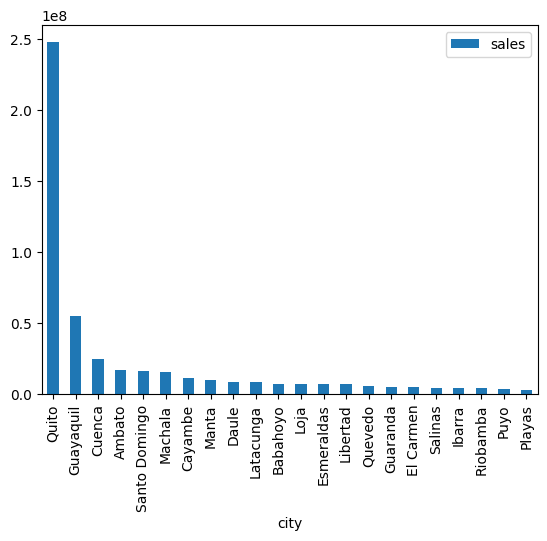

In [30]:
(
    retail_stores
    .groupby(['city'])
    .agg({'sales':'sum'})
    .sort_values(by='sales', ascending=False)
).plot.bar();

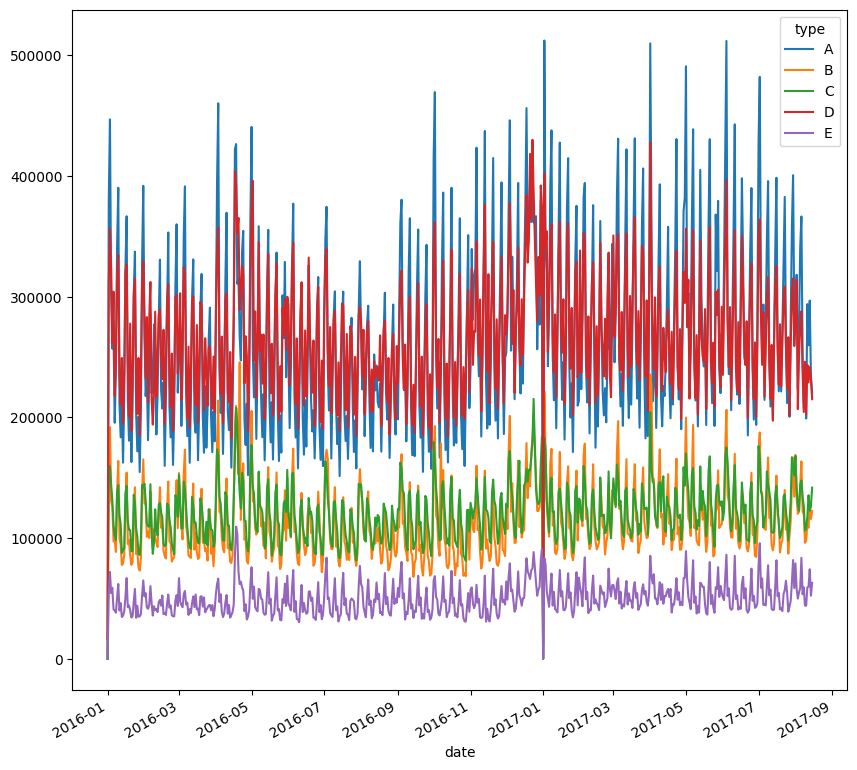

In [31]:
retail_stores.pivot_table(
    index=['date'],
    columns=['type'],
    values='sales',
    aggfunc='sum'
).plot(figsize=(10,10));

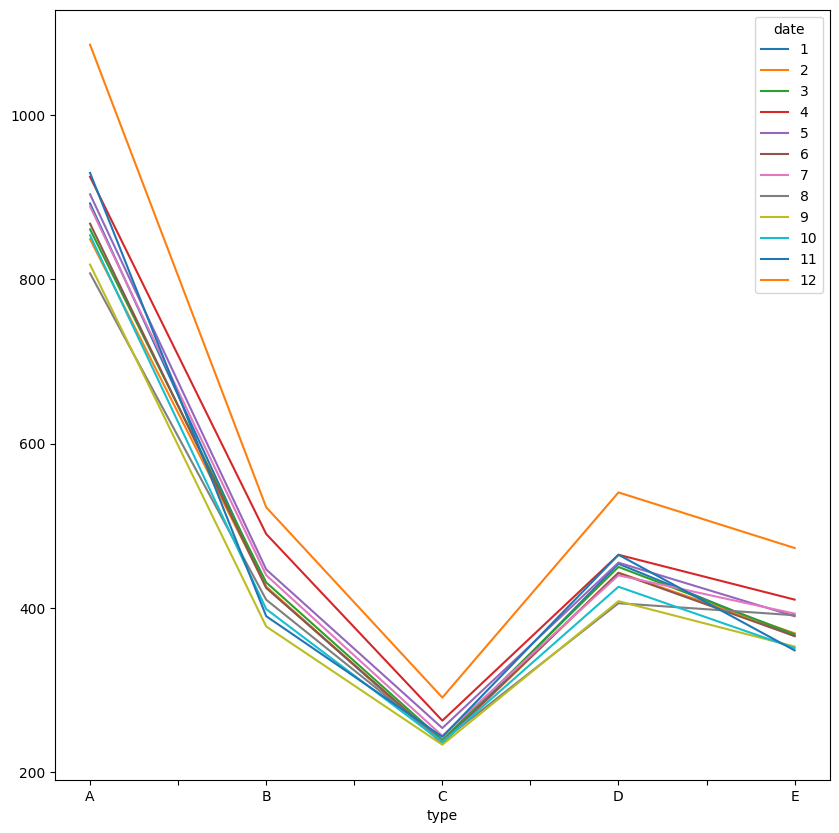

In [32]:
retail_stores.pivot_table(
    index=['type'],
    columns=retail_stores['date'].dt.month,
    values='sales',
    aggfunc='mean'
).plot(figsize=(10,10));

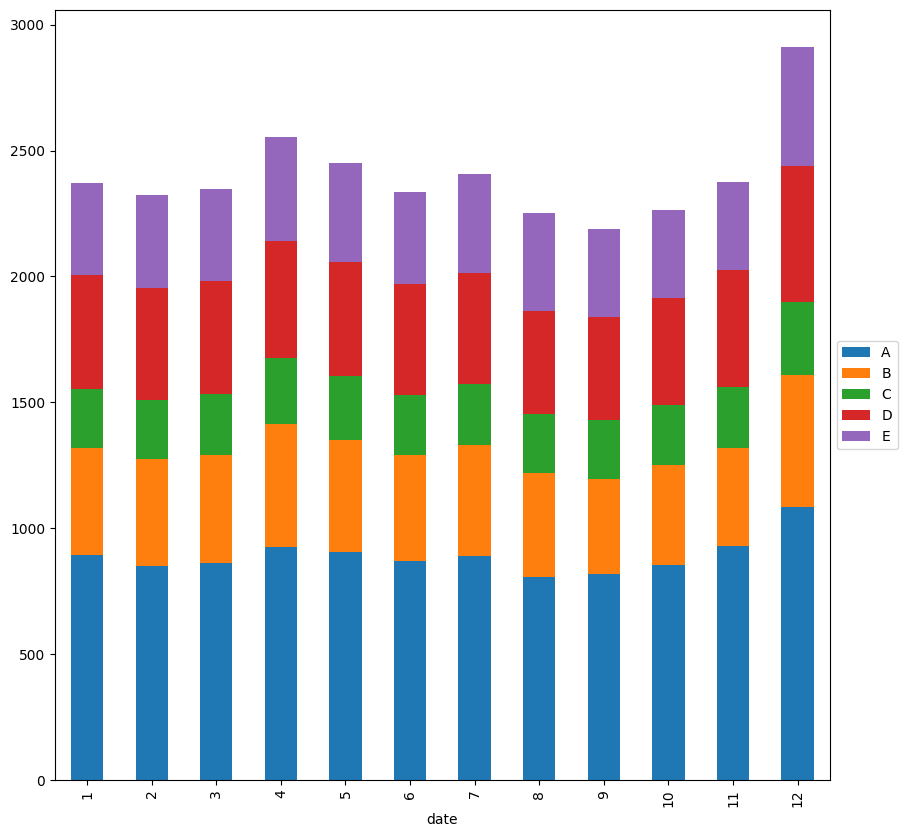

In [34]:
retail_stores.pivot_table(
    index=['type'],
    columns=retail_stores['date'].dt.month,
    values='sales',
    aggfunc='mean'
).T.plot.bar(stacked=True, figsize=(10,10)).legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

In [35]:
del [retail, stores]

## JOIN

- Ele usa o index como chave de junção, mas essa opção pode ser usada diretamente
- Pelo .merge() - com o parâmetro left_index=True e right_index=True
- Atualmente o uso é mesmo com o .MERGE()
- Foque no MERGE! Apenas ele